# CMSE 201 Final Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 201 Final Project
### &#9989;Liam Ryan
### &#9989; Section_007
#### &#9989; 12/8/2021

# ___Determining Accuracy of Pythagorean Win/Loss Models___

## Background and Motivation

The question I'm really seeking to answer in my project is:
How accurate can a baseball model based on Pythagorean win % be? I feel that I can automate a win % model and hopefully streamline it to the point that I can model entire seasons of data and compare them to actual results. The next step beyond that is to see if I can increase the accuracy of this model by accounting for change in how the baseball was constructed every year.

## Methodology


I'm hoping to simulate every game from the 2021 MLB season using the pythagorean win% model and compare the predicted scores to the actual scores. I will then do the same for 2018. I expect 2021 to be less accurate than 2018, as it has been recently reported that MLB used 2 different weighted baseballs in 2021. MLB also decided 2 months into the season to crack down on the use of sticky substances by pitchers to help them spin the ball. (Update) After modeling those 2 seasons, I've decided to attempt to do 5 seasons worth of data. I skipped 2020 because it was an "outlier" season, shortened for COVID.

Game log data obtained from https://www.retrosheet.org/gamelogs/index.html and pitching/hitting data obtained from fangraphs.com
4.53 runs scored/game per https://www.baseball-reference.com/leagues/majors/2021.shtml

Pythagorean win % =(runs^2)/((runs allowed ^2) + runs^2)
Clay Davenport's modification to account for run environment was to use a changing exponent instead of 2.

Expected runs/game and corresponding exponent- 1.5*log(xRuns) +.45


Normally,I would use the Vegas sportsbook consensus game total for the sake of exponent calculation. However, there's no easy way to get that much data on vegas odds for such a large sample size so I will be calculating it based on pitcher stats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import pandas as pd

In [3]:
hitting21 = pd.read_csv('TeamHitting.csv')
relief21 = pd.read_csv('FullRelief.csv')
starter21 = pd.read_csv('AllPitchers.csv')

hitting21.index = hitting21.iloc[:,0]
starter21.index = starter21.iloc[:,0]
relief21.index = relief21.iloc[:,0]

In [26]:
hitting19 = pd.read_csv('2019Hitting.csv')
relief19 = pd.read_csv('2019Relief.csv')
starter19 = pd.read_csv('2019Pitchers.csv')
hitting19.index = hitting19.iloc[:,0]
starter19.index = starter19.iloc[:,0]
relief19.index = relief19.iloc[:,0]


In [5]:
hitting18 = pd.read_csv('2018Hitting.csv')
relief18 = pd.read_csv('2018Relief.csv')
starter18 = pd.read_csv('2018Pitchers.csv')
hitting18.index = hitting18.iloc[:,0]
starter18.index = starter18.iloc[:,0]
relief18.index = relief18.iloc[:,0]



In [6]:
hitting17 = pd.read_csv('2017Hitting.csv')
relief17 = pd.read_csv('2017Relief.csv')
starter17 = pd.read_csv('2017Pitchers.csv')
hitting17.index = hitting17.iloc[:,0]
starter17.index = starter17.iloc[:,0]
relief17.index = relief17.iloc[:,0]


In [7]:
hitting16 = pd.read_csv('2016Hitting.csv')
relief16 = pd.read_csv('2016Relief.csv')
starter16 = pd.read_csv('2016Pitchers.csv')
hitting16.index = hitting16.iloc[:,0]
starter16.index = starter16.iloc[:,0]
relief16.index = relief16.iloc[:,0]


In [123]:
#change_name = []

#for i in games17['Home Pitcher']:
    #if i not in starter17['Name']: 
      #  change_name.append(i)
#for j in games17['Visiting Pitcher']:
    #if j not in starter17['Name']:
     #   change_name.append(i)  #This gives us a list of the pitcher in the game log that would raise a Key Error
#no_duplicate = []  #so we can edit these names without having to run the function repeatedly

#for k in change_name:
  #  if k not in no_duplicate:
      #  no_duplicate.append(k) #this gives us an easier list
        
        
        #FOR SOME REASON, THIS SECTION BROKE EVERYTHING (I don't think this was responsible for breaking it)
        #This was meant to streamline the file editing process

In [8]:
games21 = pd.read_table('GL2021.txt',delimiter=',',usecols=[0,3,6,9,10,102,104],header=None)
games21.columns= ['Date','Visiting Team', 'Home Team', "Visitor Score", 'Home Score', 'Visiting Pitcher', 'Home Pitcher']

In [9]:
games19 = pd.read_table('GL2019.txt',delimiter=',',usecols=[0,3,6,9,10,102,104],header=None)
games19.columns= ['Date','Visiting Team', 'Home Team', "Visitor Score", 'Home Score', 'Visiting Pitcher', 'Home Pitcher']

In [10]:
games18 = pd.read_table('GL2018.txt',delimiter=',',usecols=[0,3,6,9,10,102,104],header=None)
games18.columns= ['Date','Visiting Team', 'Home Team', "Visitor Score", 'Home Score', 'Visiting Pitcher', 'Home Pitcher']

In [11]:
games17 = pd.read_table('GL2017.txt',delimiter=',',usecols=[0,3,6,9,10,102,104],header=None)
games17.columns= ['Date','Visiting Team', 'Home Team', "Visitor Score", 'Home Score', 'Visiting Pitcher', 'Home Pitcher']

In [12]:
games16 = pd.read_table('GL2016.txt',delimiter=',',usecols=[0,3,6,9,10,102,104],header=None)
games16.columns= ['Date','Visiting Team', 'Home Team', "Visitor Score", 'Home Score', 'Visiting Pitcher', 'Home Pitcher']

In [124]:
relief21['League Percentile'].loc['ARI'] #we like testing to see if things work- this should be 1.1827ish

1.182706051

In [68]:
#This function calculates the expected Runs Scored and Win Percentage for each team for a single game



def game_calc(home_team,away_team,homeP,awayP,starter=starter21,relief=relief21,hitting=hitting21,xRuns=9.06): 
    
    if (starter['Team'].loc[homeP] != home_team) & (starter['Team'].loc[homeP] != '- - -'): 
        #print("Home Starter doesn't play for that team")
        #using a mismatched starter/team will probably break everything, so let's not do that
        return [0,0,.501,.499]
    elif (starter['Team'].loc[awayP] != away_team) & (starter['Team'].loc[awayP] != '- - -'):
        #print("Away Starter doesn't play for that team")
        return [0,0,.501,.499]
    else:
        away_xRA = starter['Combo'].loc[awayP]*(2/3)   +  (4.53*(1/3))*relief['League Percentile'].loc[away_team] #starter + relief xRA
        home_xRA = starter['Combo'].loc[homeP]*(2/3)   +  (4.53*(1/3))*relief['League Percentile'].loc[home_team]
        home_xRS = hitting['League Percentile'].loc[home_team] * (away_xRA/4.53) * 4.53
        away_xRS = hitting['League Percentile'].loc[away_team] * (home_xRA/4.53) * 4.53
        
        if xRuns == 9.06: #I don't really want to use the default value of 2*average runs scored/game but it's there if needed
                xRuns = home_xRS+away_xRS
        
        exponent = 1.5*math.log(xRuns,10) + .45
        
        home_win_pct = (home_xRS**exponent)/((away_xRS**exponent) + (home_xRS**exponent)) + .03 #3% home field adjustment
        away_win_pct = (away_xRS**exponent)/((home_xRS**exponent) + (away_xRS**exponent)) - .03
        
        
    
        return [home_xRS, away_xRS, home_win_pct, away_win_pct]
    

In [125]:
game_calc('ARI','LAD','Madison Bumgarner', 'Walker Buehler') #again, making sure things work

[3.2144770596258625, 5.069318162008905, 0.333131232421799, 0.666868767578201]

In [144]:
games19.iloc[0,:] #just visu19alizing things

Date                      20190320
Visiting Team                  SEA
Home Team                      OAK
Visitor Score                    9
Home Score                       7
Visiting Pitcher    Marco Gonzales
Home Pitcher         Michael Fiers
Name: 0, dtype: object

In [172]:
# IF YOU SEE AN ASTERISK, THAT IS MODIFIED CODE USED TO BREAK DOWN THE SEASON BY HALVES


def season_analysis(game_logs,season_hitting,season_starters,season_relief):
    #Breaking up expected win % into brackets
    #record = [[0,0],[0,0]]    #Overall record**
    #mortal_lock =[[0,0],[0,0]]  #>80% xWin**
    #lock = [[0,0],[0,0]]   #73%-80% xWin**
    #heavy_fave = [[0,0],[0,0]]   #65%-73% xWin**
    #medium_fave = [[0,0],[0,0]]    #55%-65%xWin**
    #toss_up = [[0,0],[0,0]]    #45%-55% xWin**
    #med_dog = [[0,0],[0,0]]    #35%-45% xWin**
    #heavy_dog = [[0,0],[0,0]]   #27%-35% xWin**
    #long_shot = [[0,0],[0,0]]  #<27% xWin**
    
    record = [0,0]    #Overall record
    mortal_lock =[0,0]  #>80% xWin
    lock = [0,0]   #73%-80% xWin
    heavy_fave = [0,0]   #65%-73% xWin
    medium_fave = [0,0]    #55%-65%xWin
    toss_up = [0,0]   #45%-55% xWin
    med_dog = [0,0]   #35%-45% xWin
    heavy_dog = [0,0]   #27%-35% xWin
    long_shot = [0,0] #<27% xWin

    starter =season_starters
    hitting = season_hitting
    relief = season_relief
    #game_num = 0**

    for i in range(0,len(game_logs)):
    
        game_info = game_logs.iloc[i,:]
        homeT = game_info[2]
        awayT=game_info[1]
        homeP=game_info[6]
        awayP=game_info[5]
        home_score= game_info[4]
        away_score = game_info[3]
        prediction = game_calc(homeT,awayT,homeP,awayP,starter,relief,hitting) #2 is homeT, 1 awayT, 6homeP,5awayP
        #game_num+=1**
    
        if type(prediction) !=list: #should skip our None loops that occur
            continue
        else: #our standard loop procedure
        
            if home_score > away_score: #0 is the win column, 1 is the loss column
                result = 0
            else:
                result = 1
            
            
            #if game_num <= (len(game_logs)/2): ****** 
             #   half = 0
            #else:
             #   half = 1
            
            
        
            #sorting by fave/underdog
            if prediction[2] >.45 and prediction[2] <.55:
                #toss_up[half][result]+=1***
                toss_up[result]+=1
                
            elif prediction[2] >.55 and prediction[2] < .65:
                #medium_fave[half][result]+=1***
                medium_fave[result]+=1
                
            elif prediction[2] > .65 and prediction[2] < .73:
                #heavy_fave[half][result] +=1
                heavy_fave[result] +=1
                
            elif prediction[2] > .73 and prediction[2] < .8:
                #lock[half][result] +=1***
                lock[result] +=1
        
            elif prediction[2] < .45 and prediction[2] >.35:
                #med_dog[half][result] +=1***
                med_dog[result] +=1
                
            elif prediction[2] < .35 and prediction[2] >.27:
                #heavy_dog[half][result] +=1***
                heavy_dog[result] +=1
                
            elif prediction[2] <.27:
                #long_shot[half][result] +=1***
                long_shot[result] +=1
                
            elif prediction[2] > .8:
                #mortal_lock[half][result] +=1***
                mortal_lock[result] +=1
        
            #This section simply looks at whether or not the winner was predicted correctly
            if (prediction[2] > .5000000 and home_score > away_score) or (prediction[3] > .500000 and away_score>home_score):
                #record[half][0] +=1**
                record[0] +=1
                
            elif prediction[0] == 0:
                pass
            else:
                #record[half][1] +=1**
                record[1] +=1
                
    return record,long_shot,heavy_dog,med_dog,toss_up,medium_fave,heavy_fave,lock,mortal_lock
    

In [157]:
results21H = season_analysis(games21,hitting21,starter21,relief21)
print("2021 Results by Half")
pct21H=[[],[],[],[],[],[],[],[],[]]

categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']

for cat in range(len(results21H)):
    
    for h in range(0,2):
        pct21H[cat].append(round(results21H[cat][h][0]/(results21H[cat][h][0]+results21H[cat][h][1])*100,2))
        
        print("The model correctly predicted the",h+1,"half",categories[cat],"winner",pct21H[cat][h],"% of the time")

2021 Results by Half
The model correctly predicted the 1 half overall winner 63.55 % of the time
The model correctly predicted the 2 half overall winner 61.44 % of the time
The model correctly predicted the 1 half long shot winner 30.0 % of the time
The model correctly predicted the 2 half long shot winner 18.75 % of the time
The model correctly predicted the 1 half heavy underdog winner 37.25 % of the time
The model correctly predicted the 2 half heavy underdog winner 32.65 % of the time
The model correctly predicted the 1 half medium underdog winner 39.56 % of the time
The model correctly predicted the 2 half medium underdog winner 42.11 % of the time
The model correctly predicted the 1 half toss up winner 54.51 % of the time
The model correctly predicted the 2 half toss up winner 48.28 % of the time
The model correctly predicted the 1 half medium favorite winner 62.42 % of the time
The model correctly predicted the 2 half medium favorite winner 57.88 % of the time
The model correctl

In [158]:
results19H = season_analysis(games19,hitting19,starter19,relief19)
print("2019 Results by Half")
pct19H=[[],[],[],[],[],[],[],[],[]]

categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']

for cat in range(len(results19H)):
    
    for h in range(0,2):
        pct19H[cat].append(round(results19H[cat][h][0]/(results19H[cat][h][0]+results19H[cat][h][1])*100,2))
        
        print("The model correctly predicted the",h+1,"half",categories[cat],"winner",pct19H[cat][h],"% of the time")

2019 Results by Half
The model correctly predicted the 1 half overall winner 61.37 % of the time
The model correctly predicted the 2 half overall winner 60.66 % of the time
The model correctly predicted the 1 half long shot winner 13.64 % of the time
The model correctly predicted the 2 half long shot winner 12.5 % of the time
The model correctly predicted the 1 half heavy underdog winner 32.08 % of the time
The model correctly predicted the 2 half heavy underdog winner 25.42 % of the time
The model correctly predicted the 1 half medium underdog winner 35.71 % of the time
The model correctly predicted the 2 half medium underdog winner 42.11 % of the time
The model correctly predicted the 1 half toss up winner 52.58 % of the time
The model correctly predicted the 2 half toss up winner 48.42 % of the time
The model correctly predicted the 1 half medium favorite winner 61.76 % of the time
The model correctly predicted the 2 half medium favorite winner 57.69 % of the time
The model correctl

In [160]:
results18H = season_analysis(games18,hitting18,starter18,relief18)
print("2018 Results by Half")
pct18H=[[],[],[],[],[],[],[],[],[]]

categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']

for cat in range(len(results18H)):
    
    for h in range(0,2):
        pct18H[cat].append(round(results18H[cat][h][0]/(results18H[cat][h][0]+results18H[cat][h][1])*100,2))
        
        print("The model correctly predicted the",h+1,"half",categories[cat],"winner",pct18H[cat][h],"% of the time")

2018 Results by Half
The model correctly predicted the 1 half overall winner 58.85 % of the time
The model correctly predicted the 2 half overall winner 61.51 % of the time
The model correctly predicted the 1 half long shot winner 10.0 % of the time
The model correctly predicted the 2 half long shot winner 0.0 % of the time
The model correctly predicted the 1 half heavy underdog winner 36.73 % of the time
The model correctly predicted the 2 half heavy underdog winner 30.23 % of the time
The model correctly predicted the 1 half medium underdog winner 35.98 % of the time
The model correctly predicted the 2 half medium underdog winner 42.44 % of the time
The model correctly predicted the 1 half toss up winner 48.42 % of the time
The model correctly predicted the 2 half toss up winner 47.96 % of the time
The model correctly predicted the 1 half medium favorite winner 58.74 % of the time
The model correctly predicted the 2 half medium favorite winner 65.18 % of the time
The model correctly 

In [162]:
results17H = season_analysis(games17,hitting17,starter17,relief17)
print("2017 Results by Half")
pct17H=[[],[],[],[],[],[],[],[],[]]

categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']

for cat in range(len(results17H)):
    
    for h in range(0,2):
        pct17H[cat].append(round(results17H[cat][h][0]/(results17H[cat][h][0]+results17H[cat][h][1])*100,2))
        
        print("The model correctly predicted the",h+1,"half",categories[cat],"winner",pct17H[cat][h],"% of the time")

2017 Results by Half
The model correctly predicted the 1 half overall winner 58.52 % of the time
The model correctly predicted the 2 half overall winner 60.0 % of the time
The model correctly predicted the 1 half long shot winner 0.0 % of the time
The model correctly predicted the 2 half long shot winner 0.0 % of the time
The model correctly predicted the 1 half heavy underdog winner 30.36 % of the time
The model correctly predicted the 2 half heavy underdog winner 34.0 % of the time
The model correctly predicted the 1 half medium underdog winner 43.53 % of the time
The model correctly predicted the 2 half medium underdog winner 39.83 % of the time
The model correctly predicted the 1 half toss up winner 52.55 % of the time
The model correctly predicted the 2 half toss up winner 50.24 % of the time
The model correctly predicted the 1 half medium favorite winner 59.54 % of the time
The model correctly predicted the 2 half medium favorite winner 61.84 % of the time
The model correctly pre

In [163]:
results16H = season_analysis(games16,hitting16,starter16,relief16)
print("2016 Results by Half")
pct16H=[[],[],[],[],[],[],[],[],[]]

categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']

for cat in range(len(results16H)):
    
    for h in range(0,2):
        pct16H[cat].append(round(results16H[cat][h][0]/(results16H[cat][h][0]+results16H[cat][h][1])*100,2))
        
        print("The model correctly predicted the",h+1,"half",categories[cat],"winner",pct16H[cat][h],"% of the time")

2016 Results by Half
The model correctly predicted the 1 half overall winner 59.47 % of the time
The model correctly predicted the 2 half overall winner 58.98 % of the time
The model correctly predicted the 1 half long shot winner 12.5 % of the time
The model correctly predicted the 2 half long shot winner 30.0 % of the time
The model correctly predicted the 1 half heavy underdog winner 24.32 % of the time
The model correctly predicted the 2 half heavy underdog winner 33.33 % of the time
The model correctly predicted the 1 half medium underdog winner 36.41 % of the time
The model correctly predicted the 2 half medium underdog winner 40.4 % of the time
The model correctly predicted the 1 half toss up winner 51.86 % of the time
The model correctly predicted the 2 half toss up winner 52.13 % of the time
The model correctly predicted the 1 half medium favorite winner 60.43 % of the time
The model correctly predicted the 2 half medium favorite winner 59.25 % of the time
The model correctly 

In [165]:
pct16H

[[59.47, 58.98],
 [12.5, 30.0],
 [24.32, 33.33],
 [36.41, 40.4],
 [51.86, 52.13],
 [60.43, 59.25],
 [62.77, 67.59],
 [76.0, 81.82],
 [85.71, 50.0]]

In [173]:
results21 = season_analysis(games21,hitting21,starter21,relief21)
print("2021 SEASON RESULTS")
pct21 = []
categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']
for num in range(len(results21)):
    pct21.append(round(results21[num][0]/(results21[num][0]+results21[num][1])*100,2))
    print("The model correctly predicted the",categories[num],"winner",str(round(results21[num][0]/(results21[num][0]+results21[num][1])*100,2)),"% of the time")

2021 SEASON RESULTS
The model correctly predicted the overall winner 62.5 % of the time
The model correctly predicted the long shot winner 25.0 % of the time
The model correctly predicted the heavy underdog winner 35.0 % of the time
The model correctly predicted the medium underdog winner 40.92 % of the time
The model correctly predicted the toss up winner 51.3 % of the time
The model correctly predicted the medium favorite winner 60.31 % of the time
The model correctly predicted the heavy favorite winner 69.36 % of the time
The model correctly predicted the lock winner 81.82 % of the time
The model correctly predicted the guaranteed winner winner 73.81 % of the time


In [92]:
results19 = season_analysis(games19,hitting19,starter19,relief19)
print("2019 SEASON RESULTS")
pct19=[]
categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']
for num in range(len(results19)):
    pct19.append(round(results19[num][0]/(results19[num][0]+results19[num][1])*100,2))
    print("The model correctly predicted the",categories[num],"winner",str(round(results19[num][0]/(results19[num][0]+results19[num][1])*100,2)),"% of the time")

2019 SEASON RESULTS
The model correctly predicted the overall winner 61.01 % of the time
The model correctly predicted the long shot winner 13.16 % of the time
The model correctly predicted the heavy underdog winner 28.57 % of the time
The model correctly predicted the medium underdog winner 38.84 % of the time
The model correctly predicted the toss up winner 50.44 % of the time
The model correctly predicted the medium favorite winner 59.82 % of the time
The model correctly predicted the heavy favorite winner 73.28 % of the time
The model correctly predicted the lock winner 83.33 % of the time
The model correctly predicted the guaranteed winner winner 81.82 % of the time


In [155]:
pct19

[61.01, 13.16, 28.57, 38.84, 50.44, 59.82, 73.28, 83.33, 81.82]

In [93]:
results18 = season_analysis(games18,hitting18,starter18,relief18)
print("2018 SEASON RESULTS")
pct18=[]
categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']
for num in range(len(results18)):
    pct18.append(round(results18[num][0]/(results18[num][0]+results18[num][1])*100,2))
    print("The model correctly predicted the",categories[num],"winner",str(round(results18[num][0]/(results18[num][0]+results18[num][1])*100,2)),"% of the time")

2018 SEASON RESULTS
The model correctly predicted the overall winner 60.18 % of the time
The model correctly predicted the long shot winner 5.88 % of the time
The model correctly predicted the heavy underdog winner 33.7 % of the time
The model correctly predicted the medium underdog winner 39.38 % of the time
The model correctly predicted the toss up winner 48.2 % of the time
The model correctly predicted the medium favorite winner 62.01 % of the time
The model correctly predicted the heavy favorite winner 72.47 % of the time
The model correctly predicted the lock winner 68.29 % of the time
The model correctly predicted the guaranteed winner winner 92.31 % of the time


In [94]:
results17 = season_analysis(games17,hitting17,starter17,relief17)
print("2017 SEASON RESULTS")
pct17=[]
categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']
for num in range(len(results17)):
    pct17.append(round(results17[num][0]/(results17[num][0]+results17[num][1])*100,2))
    print("The model correctly predicted the",categories[num],"winner",str(round(results17[num][0]/(results17[num][0]+results17[num][1])*100,2)),"% of the time")

2017 SEASON RESULTS
The model correctly predicted the overall winner 59.26 % of the time
The model correctly predicted the long shot winner 0.0 % of the time
The model correctly predicted the heavy underdog winner 32.08 % of the time
The model correctly predicted the medium underdog winner 41.65 % of the time
The model correctly predicted the toss up winner 51.36 % of the time
The model correctly predicted the medium favorite winner 60.71 % of the time
The model correctly predicted the heavy favorite winner 71.21 % of the time
The model correctly predicted the lock winner 75.0 % of the time
The model correctly predicted the guaranteed winner winner 100.0 % of the time


In [86]:
results16 = season_analysis(games16,hitting16,starter16,relief16)
print("2016 SEASON RESULTS")
pct16 = []
categories = ['overall','long shot', 'heavy underdog', 'medium underdog', 'toss up', 'medium favorite', 'heavy favorite','lock','guaranteed winner']
for num in range(len(results16)):
    pct16.append(round(results16[num][0]/(results16[num][0]+results16[num][1])*100,2))
    print("The model correctly predicted the",categories[num],"winner",str(round(results16[num][0]/(results16[num][0]+results16[num][1])*100,2)),"% of the time")

2016 SEASON RESULTS
The model correctly predicted the overall winner 59.23 % of the time
The model correctly predicted the long shot winner 22.22 % of the time
The model correctly predicted the heavy underdog winner 28.12 % of the time
The model correctly predicted the medium underdog winner 38.31 % of the time
The model correctly predicted the toss up winner 51.99 % of the time
The model correctly predicted the medium favorite winner 59.82 % of the time
The model correctly predicted the heavy favorite winner 65.35 % of the time
The model correctly predicted the lock winner 78.72 % of the time
The model correctly predicted the guaranteed winner winner 77.78 % of the time


In [110]:
overalls=[pct16[0],pct17[0],pct18[0],pct19[0],pct21[0]]
long_shots=[pct16[1],pct17[1],pct18[1],pct19[1],pct21[1]]
heavy_dogs=[pct16[2],pct17[2],pct18[2],pct19[2],pct21[2]]
med_dogs=[pct16[3],pct17[3],pct18[3],pct19[3],pct21[3]]
toss_ups=[pct16[4],pct17[4],pct18[4],pct19[4],pct21[4]]
med_faves=[pct16[5],pct17[5],pct18[5],pct19[5],pct21[5]]
heavy_faves=[pct16[6],pct17[6],pct18[6],pct19[6],pct21[6]]
locks=[pct16[7],pct17[7],pct18[7],pct19[7],pct21[7]]
guarantees=[pct16[8],pct17[8],pct18[8],pct19[8],pct21[8]]

all_pcts = [overalls,long_shots,heavy_dogs,med_dogs,toss_ups,med_faves,heavy_faves,locks,guarantees]
expected_pcts =[55,22,31,40,50,60,69,76.5,85]
diff = [[],[],[],[],[],[],[],[],[]]

for i in range(len(overalls)):
    for j in range(len(all_pcts)):
        difference = round(all_pcts[j][i]-expected_pcts[j],2)
        diff[j].append(difference)


seasons=[2016,2017,2018,2019,2021]
 
#This was used for full season (not split) to calculate how often a team with a given win % actually wins said game

In [108]:
diff[2]

[-2.88, 1.08, 2.7, -2.43, 4.0]

In [166]:
#use this for split halves


half_diff = [[],[],[],[],[],[],[],[],[]]
seasonsH = [pct16H,pct17H,pct18H,pct19H,pct21H]


for l in range(len(pct17H)):
    for season in seasonsH:
        half_diff[l].append(season[l][1]-season[l][0])

In [167]:
half_diff

[[0.490000000000002,
  -1.4799999999999969,
  -2.6599999999999966,
  0.7100000000000009,
  2.1099999999999994],
 [-17.5, 0.0, 10.0, 1.1400000000000006, 11.25],
 [-9.009999999999998,
  -3.6400000000000006,
  6.4999999999999964,
  6.659999999999997,
  4.600000000000001],
 [-3.990000000000002,
  3.700000000000003,
  -6.460000000000001,
  -6.399999999999999,
  -2.549999999999997],
 [-0.2700000000000031,
  2.309999999999995,
  0.46000000000000085,
  4.159999999999997,
  6.229999999999997],
 [1.1799999999999997,
  -2.3000000000000043,
  -6.440000000000005,
  4.07,
  4.539999999999999],
 [-4.82,
  2.219999999999999,
  -1.5600000000000023,
  -13.159999999999997,
  -0.5300000000000011],
 [-5.819999999999993,
  -13.939999999999998,
  -32.62,
  -0.8599999999999994,
  -15.11],
 [35.709999999999994, 0.0, 20.0, 6.840000000000003, -0.22999999999998977]]

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

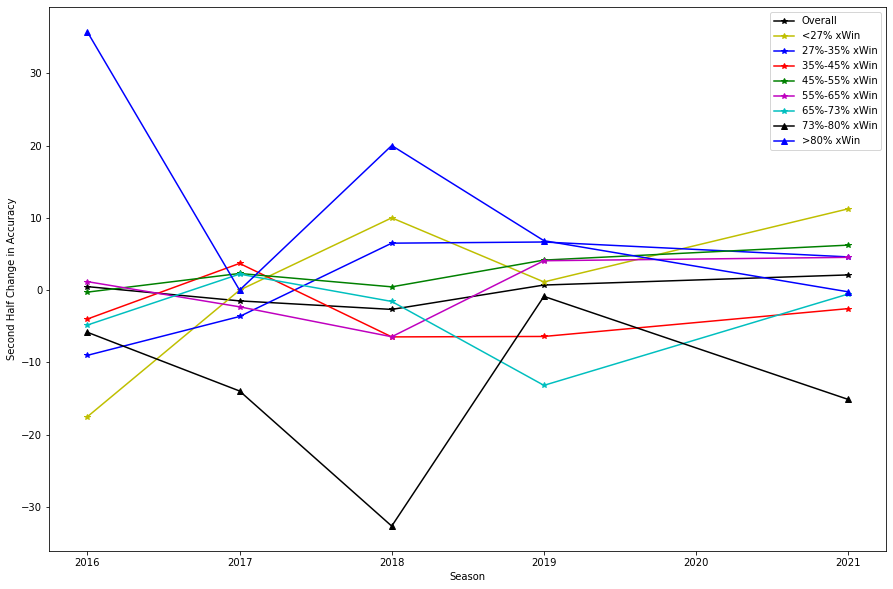

In [169]:
plt.figure(figsize=[15,10])

plt.plot(seasons,half_diff[0],'k*-',label='Overall')
plt.plot(seasons,half_diff[1],'y*-',label='<27% xWin')
plt.plot(seasons,half_diff[2],'b*-',label='27%-35% xWin')
plt.plot(seasons,half_diff[3],'r*-',label='35%-45% xWin')
plt.plot(seasons,half_diff[4],'g*-',label='45%-55% xWin')
plt.plot(seasons,half_diff[5],'m*-',label='55%-65% xWin')
plt.plot(seasons,half_diff[6],'c*-',label='65%-73% xWin')
plt.plot(seasons,half_diff[7],'k^-',label='73%-80% xWin')
plt.plot(seasons,half_diff[8],'b^-',label='>80% xWin')
plt.xlabel('Season')
plt.ylabel('Second Half Change in Accuracy')
plt.legend()

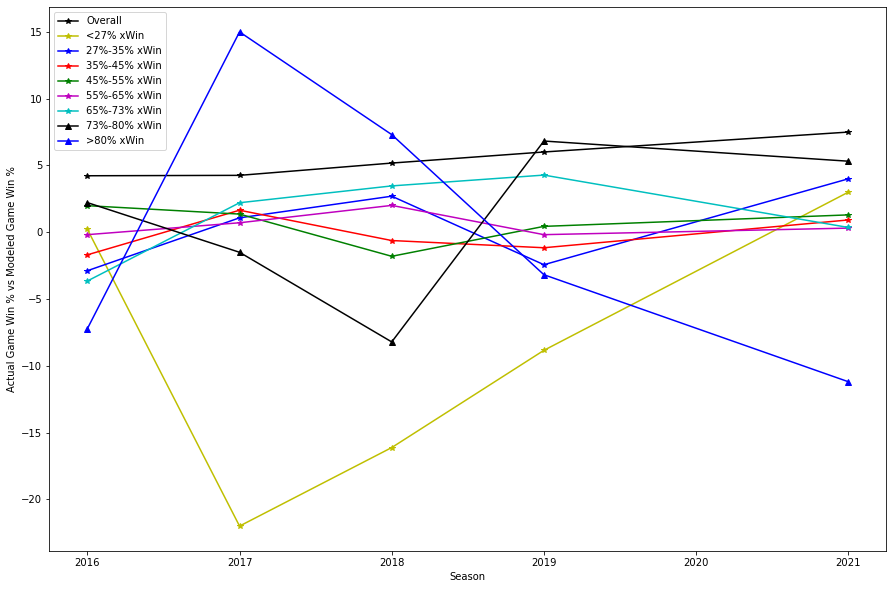

In [122]:

#This is simply year over year actual vs expected game win %
plt.figure(figsize=[15,10])
plt.plot(seasons,diff[0],'k*-',label='Overall')
plt.plot(seasons,diff[1],'y*-',label='<27% xWin')
plt.plot(seasons,diff[2],'b*-',label='27%-35% xWin')
plt.plot(seasons,diff[3],'r*-',label='35%-45% xWin')
plt.plot(seasons,diff[4],'g*-',label='45%-55% xWin')
plt.plot(seasons,diff[5],'m*-',label='55%-65% xWin')
plt.plot(seasons,diff[6],'c*-',label='65%-73% xWin')
plt.plot(seasons,diff[7],'k^-',label='73%-80% xWin')
plt.plot(seasons,diff[8],'b^-',label='>80% xWin')
plt.xlabel('Season')
plt.ylabel('Actual Game Win % vs Modeled Game Win %')
plt.legend()

## Discussion and Conclusion


The biggest obstalce for this project was the availability and usability of the data. Retrosheet.org was the only site I found that provided full game logs and pitching information for more than a day's worth of games. The actual calculation and sorting of results was the easy part. The other issue with my method is that I had to continuously rerun my season analysis function until I cleared up all of the KeyErrors, because my data files and game log files had different names for some Pitchers. Tom Milone vs Tommy, Matt Boyd vs Matthew, Lance McCullers Jr. vs Lance McCullers. So if I had some easier way to check which names were different, it would be quicker to edit the pitcher data files. (Update) I did find a way to streamline this a bit by making a list of values that were in one file but not the other, but I thought it broke everything. Looking back I think I know what was actually causing it to go wrong and have fixed it but I'm too scared to try that streamlining again. Another obstacle was 2 pitchers with the same name, that had to be manually corrected before the function could run.



The game log text file also uses alternate team abbreviations to account for team names changing over the years, so I had to update those before using the files (CHN is CHC, CHA is CHW).

While the model overall seems to be significantly accurate, successfully predicting game winners ~61% of the time, I believe there's too much variation within the win% brackets year over year for this information to be actionable. The most consistent overperformer was teams with an expected win % between 63% and 70%, as they went over the mark in 3/5 years.

The next step in this venture would be a multivariate regression to determine which stats best predict win %, but there's no time for that now. I'm also curious how the margin of victory is increased with higher win %.

### References


Murray, Michael. Betting Baseball 2019. Publisher info not available.
“2017-2021 Game Logs.” Retrosheet Game Logs, https://www.retrosheet.org/gamelogs/index.html. 
“Major League Leaderboards " 2021 " Batters " Dashboard: Fangraphs Baseball.” Major League Leaderboards " 2021 " Batters " Dashboard | FanGraphs Baseball, https://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=bat&amp;lg=all&amp;qual=y&amp;type=8&amp;season=2021&amp;month=0&amp;season1=2021&amp;ind=0. 
“2021 Major League Baseball Season Summary.” Baseball, https://www.baseball-reference.com/leagues/majors/2021.shtml. 